# Import necessary libraries

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# onehot encoding
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load your dataset

The Data directory contain SwahiliNewsClassification dataset that will be used in this notebook.
<br>Swahili News were collected from different websites that provide news in the Swahili language. The creator of the dataset was able to find some websites that provide news in Swahili only and others in different languages including Swahili.<br>
Source: [Swahili News Classification](https://www.kaggle.com/datasets/waalbannyantudre/swahili-news-classification-dataset)

In [4]:
data_path = 'data/SwahiliNewsClassificationDataset.csv'
df = pd.read_csv(data_path)

# Data preprocessing

In [5]:
df.head(2)

,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa


## Normalize the data

This step is to normalize the data by removing the punctuation, numbers, and special characters.<br>
*Also to remove the stop words and lemmatize the words finally to convert the words to lower case.*

In [7]:
import re
def normalize_text(text):
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [9]:
# Normalize the text column
df['Text'] = df['content'].apply(normalize_text)

In [22]:
texts = df['Text'].values
labels = df['category'].values

In [12]:
texts[0], labels[0]

(' bodi ya utalii tanzania ttb imesema itafanya misafara ya kutangaza utalii kwenye miji minne nchini china kati ya juni  hadi juni  mwaka huumisafara hiyo itatembelea miji ya beijing juni  shanghai juni  nanjig juni  na changsha juni mwenyekiti wa bodi ttb jaji mstaafu thomas mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini dar es salaamtunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka china hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini amesema jaji mihayonovemba  ttb ilifanya ziara kwenye miji ya beijing shanghai chengdu guangzhou na hong kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za air tanzaniaziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya  kuja nchini mei mwaka huu kutembelea vivutio vya utalii',
 'uchumi')

# Convert labels to numerical format

This step is to convert the labels to numerical format to be able to use them in the model.

final outcome will be a one-hot encoded vector for each label.

In [24]:
# one hot encode the labels
encoder = OneHotEncoder(sparse=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

c:\Users\Edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
encoder.categories_

[array(['afya', 'burudani', 'kimataifa', 'kitaifa', 'michezo', 'uchumi'],
       dtype=object)]

In [28]:
# # save the encoder
# import joblib
# joblib.dump(encoder, 'encoder.joblib')

# Split the dataset into training and testing sets

In [29]:
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize and pad sequences

In this section you will be required to tokenize the words and pad the sequences. try different approaches and see which one gives you the best results.  <br>  <br>
You can try the Tokenization strategies notebook for more guidance.

In [30]:
max_words = 1000  # Adjust based on your dataset size
max_len = 200      # Adjust based on the average length of your news articles

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

In [36]:
train_data[0].shape

(200,)

In [38]:
train_data[0].shape, train_labels[0].shape

((200,), (6,))

# Build the model

In [40]:
del model

In [45]:
embedding_dim = 50  # Adjust based on your preferences

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
466/466 [==============================] - 82s 166ms/step - loss: 0.9740 - accuracy: 0.6743 - val_loss: 0.7077 - val_accuracy: 0.7744
Epoch 2/10
466/466 [==============================] - 79s 169ms/step - loss: 0.6562 - accuracy: 0.7969 - val_loss: 0.5706 - val_accuracy: 0.8405
Epoch 3/10
466/466 [==============================] - 82s 175ms/step - loss: 0.5938 - accuracy: 0.8232 - val_loss: 0.5411 - val_accuracy: 0.8319
Epoch 4/10
466/466 [==============================] - 82s 175ms/step - loss: 0.5702 - accuracy: 0.8325 - val_loss: 0.5651 - val_accuracy: 0.8324
Epoch 5/10
466/466 [==============================] - 89s 191ms/step - loss: 0.5910 - accuracy: 0.8224 - val_loss: 0.5712 - val_accuracy: 0.8219
Epoch 6/10
466/466 [==============================] - 95s 204ms/step - loss: 0.5096 - accuracy: 0.8414 - val_loss: 0.5486 - val_accuracy: 0.8367
Epoch 7/10
466/466 [==============================] - 96s 205ms/step - loss: 0.4979 - accuracy: 0.8470 - val_loss: 0.5605 - val_ac

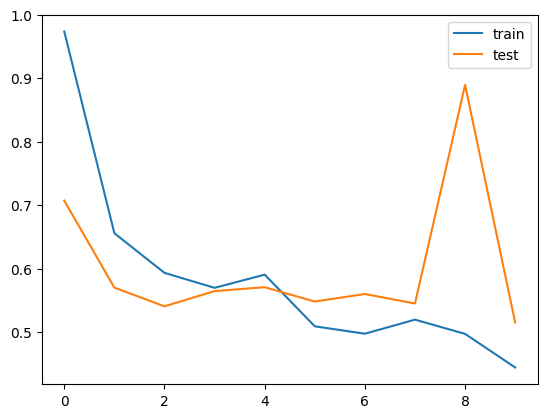

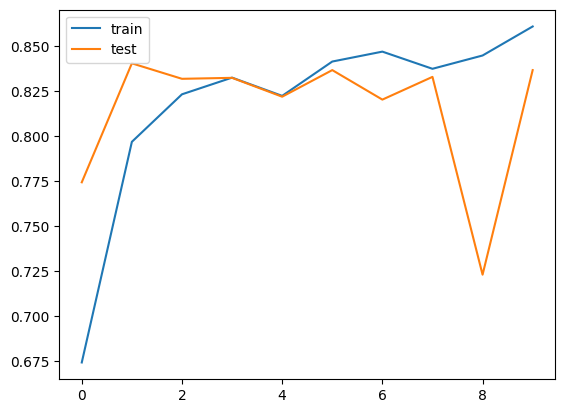

In [46]:
batch_size = 32
epochs = 10

history = model.fit(train_data, train_labels, validation_split=0.2, batch_size=batch_size, epochs=epochs)

# plot loss and accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## inference to the model

In [79]:
# pre-process for inference
def pre_process(tokenizer, max_len, input_text):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    input_data = pad_sequences(input_sequence, maxlen=max_len)
    return input_data

In [94]:
def classify_news(model, tokenizer, encoder, max_len, input_text):
    input_data = pre_process(tokenizer, max_len, input_text)
    pred = model.predict(input_data)
    res = encoder.inverse_transform(pred)[0][0]
    return res

In [125]:
# pick a random news headline from df
news_ = df.sample(1)

news_headline = news_['Text'].values[0]
news_category = news_['category'].values[0]

classified_label = classify_news(model, tokenizer, encoder, max_len, news_headline)

print(f'News headline: {news_headline}')
print(f'Actual category: {news_category}')
print(f'Predicted category: {classified_label}')

1/1 [==============================] - 0s 49ms/step
News headline: andrew msechu  dar es salaam  tume ya haki za binadamu na utawala bora thbub
imeelezwa kusikitishwa na kauli zinazotolewa na baadhi ya
viongozi na makundi ya kisiasa na kijamii zinazoashiria
uvunjifu wa haki za binadamu na ukiukwaji wa misingi ya utawala bora nchini  katika taarifa yake kwa vyombo vya habari jana
mwenyekiti wa tume hiyo jaji mstaafu mathew mwalimu alisema kauli hizo
zimekuwa zikichochea kwa kiasi kikubwa wananchi
kujichukulia sheria mikononi mwao kutokana na kutoridhishwa
na vitendo vya baadhi ya wanasiasa taarifa ya tume hiyo imekuja ikiwa ni siku chache tangu
mbunge wa kuteuliwa abdallah bulembo kutoa kauli ambayo baadhi waliitafsiri
kuwa inalenga kumtisha mbunge wa kigoma ujiji zitto kabwe katika kauli yake bulembo alisema kuna mtu mmoja
aliyechukua maswala yetu ya ndani na kuyapeleka nje ya taifa hafai kuruhusiwa
kurudi na anafaa kuuawa pale alipo uhaini kile ambacho zitto kabwe amekuwa akilifanyia
